### Step 1: Importing the necessary libraries

In [1]:
#Import Libraries
import numpy as np
import cv2 
import dlib
import urllib.request

### Step 2: Downloading and visualising the image

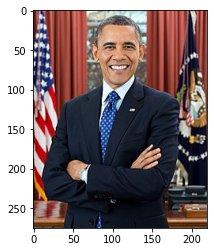

In [2]:
#download the any facial image and store at given path
import matplotlib.pyplot as plt
image_path = "/usercode/image.jpg"
image_url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/8/8d/President_Barack_Obama.jpg/220px-President_Barack_Obama.jpg'
urllib.request.urlretrieve(image_url, image_path)
image = plt.imread(image_path)
plt.imshow(image)
plt.show()

### Step 3: Loading the DNN network

In [3]:
#load the dnn network
prototxt = 'deploy.prototxt'
model = 'res10_300x300_ssd_iter_140000.caffemodel'
net = cv2.dnn.readNetFromCaffe(prototxt, model)

### Step 4: Prepare the image for the network

In [4]:
#prepare the image for netowrk input
(h, w) = image.shape[:2]
res_image = cv2.resize(image, (300, 300))
blob = cv2.dnn.blobFromImage(res_image, 1.0, (300, 300), (104., 177., 123.))


### Step 5: Running the network

In [5]:
#run the netwrok with input image
net.setInput(blob)
detections = net.forward()
print(detections)

[[[[0.         1.         0.99989784 ... 0.06563911 0.6071151
    0.3406037 ]
   [0.         1.         0.10190939 ... 0.3689416  1.
    0.53924096]
   [0.         1.         0.1008749  ... 0.29204506 0.10352632
    0.36774844]
   ...
   [0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    0.        ]]]]


### Step 6: Labelling and visualizing the image

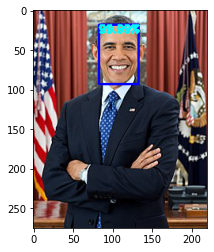

In [6]:
#label and visualise the image
for i in range(0, detections.shape[2]):
    confidence = detections[0, 0, i, 2]
    if confidence > .5:
        box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
        (start_X, start_Y, end_X, end_Y) = box.astype('int')
        text = '{:.2f}%'.format(confidence * 100)
        y = start_Y - 10 if start_Y - 10 > 10 else start_Y + 10
        cv2.rectangle(image, (start_X, start_Y), (end_X, end_Y), (0, 0, 255), 2) 
        cv2. putText(image, text, (start_X, y), cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 250, 255), 2)
        plt.imshow(image)
        plt.show()

### Step 7: Converting the image to grayscale

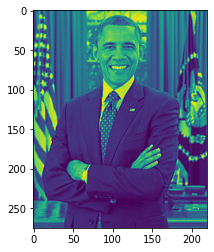

In [8]:
#read and convert the image to grayscale
image = cv2.imread(image_path)
image_Gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image_Gray)
plt.show()

### Step 8: Running the detector using dlib

In [9]:
#use HOG based face detector from dlib
detector = dlib.get_frontal_face_detector()
faces = detector(image_Gray, 1)

### Step 9: Labelling the image and visualising the result

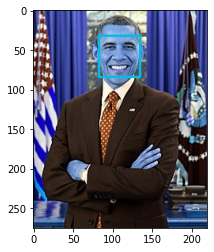

In [10]:
#get the dimesnions of the boxes for detetcted faces
for result in faces:
    x = result.left()
    y = result.top()
    x1 = result.right()
    y1 = result.bottom()
    cv2.rectangle(image, (x, y), (x1, y1), (0, 190, 230), 2)
plt.imshow(image)
plt.show()

### Step 10: Testing both models for different images

In [ ]:
#test the both models for any facial image you like